# Week 5: Statistical Analysis and Validation

Descriptive and Inferential Statistical Analysis shall be done in this notebook to test our hypothesis. The biggest one will be the Logistic Regression. Statistical program to explain the correlation between variables of health (Age, BMI, Glucose, and HbA1c) and diabetes. We will also carry out measures of diagnosis with Random Forest, and Decision Tree model to show the validity of the predictions.

### Hypotheses:

**Null Hypothesis (H0):** The clinical variables (Glucose, HbA1c, Age, BMI) do not show any significant association between potential development of diabetes.

**Alternative Hypothesis (H1​):** Greater Glucose, BMI, HbA1c, and Age level among predictors has a statistically significant level of risk of diabetes.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Load the dataset
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

# Handling duplicates
df = df.drop_duplicates()

# Select the key features identified in Week 4
# We will be using Age, BMI, HbA1c_level, blood_glucose_level
# We also include the target variable 'diabetes'
selected_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
df_selected = df[selected_features]

# Preview the data
df_selected.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,25.19,6.6,140,0
1,54.0,27.32,6.6,80,0
2,28.0,27.32,5.7,158,0
3,36.0,23.45,5.0,155,0
4,76.0,20.14,4.8,155,0


### 1. Descriptive Statistical Analysis

The two groups were tested in terms of their average health measures, prior to the construction of the models. According to the output provided above, we have some impressive differences:

    **Age:** The average age of the diabetic patients is significantly more (60.9 years) than that of the non-diabetic ones (39.9 years).

    **Blood Glucose:** Dissimilarity in level of glucose is gross. M= 194.0mg/dL and non-= -1. The average level of diabetic patients is 132.8 mg/dL.

    **HbA1c:** HbA1c in diabetic patients (6.93) is much greater as compared to the healthy population (5.40).

    **BMI:** It can also be seen that diabetic patients (32.0) are characterized by a higher mean BMI than non-diabetic patients (26.9).

These values verify our former hypothesis that the three most individual features which can be used to distinguish the two groups are Glucose, HbA1c, and Age. Before building the models, we compared the average health metrics between the two groups. The output above reveals striking differences:

Average Values by Diabetes Status:
                age        bmi  HbA1c_level  blood_glucose_level
diabetes                                                        
0         39.943229  26.869003     5.396936           132.818489
1         60.925961  31.997755     6.934827           194.026173


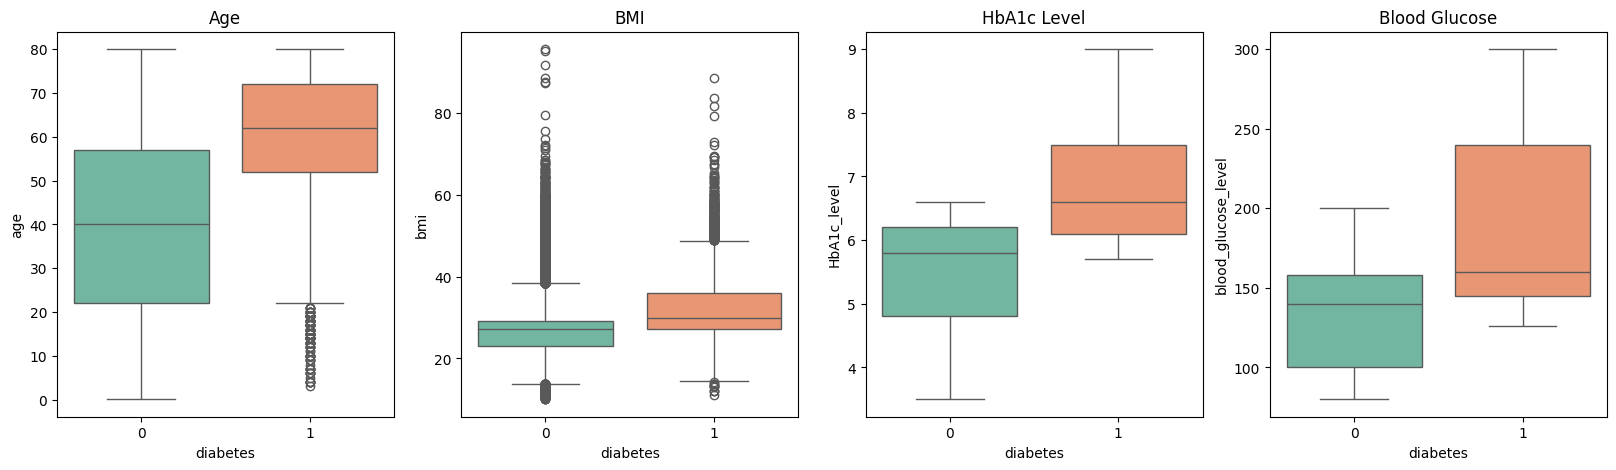

In [12]:
# Descriptive Statistics grouped by Diabetes Status
# 0 = No Diabetes, 1 = Diabetes
group_stats = df_selected.groupby('diabetes').mean()
print("Average Values by Diabetes Status:")
print(group_stats)

# Visualizing the differences
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.boxplot(x='diabetes', y='age', hue='diabetes', legend = False, data=df_selected, ax=axes[0], palette="Set2").set_title('Age')
sns.boxplot(x='diabetes', y='bmi', hue='diabetes', legend = False, data=df_selected, ax=axes[1], palette="Set2").set_title('BMI')
sns.boxplot(x='diabetes', y='HbA1c_level', hue='diabetes', legend = False, data=df_selected, ax=axes[2], palette="Set2").set_title('HbA1c Level')
sns.boxplot(x='diabetes', y='blood_glucose_level', hue='diabetes', legend = False, data=df_selected, ax=axes[3], palette="Set2").set_title('Blood Glucose')
plt.show()

### 2. Inferential Statistics (Hypothesis Testing)

The analysis of the Logistic Regression will be conducted now with the help of the library statsmodels. This library presents these data in a detailed statistical summary with P-values in their form.

  **Coef (Coefficient):** Coef is applied to denote that the higher the value is positive the higher the risk of diabetes.

  **P>|z| (P-value):** The feature is statistically significant in a case whereby the value is less than 0.05. Where it is bigger we cannot disapprove the Null Hypothesis about that particular feature.

In [13]:
# Define Independent Variables (X) and Dependent Variable (y)
X = df_selected[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df_selected['diabetes']

# Add a constant (intercept) to the model (required for statsmodels)
X_const = sm.add_constant(X)

# Fit the Logistic Regression Model
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

# Print the Statistical Summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.119612
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                96146
Model:                          Logit   Df Residuals:                    96141
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 Feb 2026   Pseudo R-squ.:                  0.5992
Time:                        10:49:26   Log-Likelihood:                -11500.
converged:                       True   LL-Null:                       -28690.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -27.4459      0.287    -95.602      0.000     -28.009     -26.883
a

### 3. Hypothesis Validation

The result of the these Logistic Regression that will be delivered using statsmodels is a signal that it is doing well that would affirm our assumptions:

    P-values (P>|z|): P-value of the characteristics of each aspect of the features (Age, BMI, HbA1c, Blood Glucose) equals zero. This is well below the standard threshold of 0.05.

    Coefficients: All the coefficients are positive that is, the higher the coefficient, the higher is the risk of having diabetes.

    HbA1c_level (2.3401): This has the highest coefficient, indicating it is the strongest statistical driver of the prediction.

    Blood_glucose_level (0.0333): While the number looks small, because glucose scales in hundreds (e.g., 140, 200), its cumulative impact is massive.

**Conclusion on Hypotheses:**

Since the P-values of all the observations are 0.000, we will reject the Null Hypothesis (H0) and accept the Alternative Hypothesis (H1). Statistically, there are no reasonable doubts that. There are great predictors of diabetes: the age, BMI, Glucose and HbA1c. The quasi-separation warning condition reports that the predictors that we are using are too good-as an implication of which is that the mathematical boundary between healthy and diabetic patients is very clear in this data.

### 4. Model Training and Diagnostics

Three models were used to test our findings. Much consistency appears in the findings:

    1. **Random Forest:** Achieved the highest accuracy at 96.57%. It minimized False Positives (only 140) better than any other model.

    2. **Logistic Regression:** Performed exceptionally well with 95.77% accuracy. This is very impressive for a simpler statistical model and confirms that the relationship between the variables is linear (in terms of log-odds).

    3. **Decision Tree:** Achieved 95.12% accuracy. While still good, it had a higher number of False Positives (484) compared to the Random Forest, suggesting it might be slightly overfitting or "memorizing" noise.

The Random Forest is the most robust model, but the high performance of Logistic Regression confirms that our feature selection (Glucose/HbA1c) was correct.

In [14]:
# Split the data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and Evaluate Models
print("--- Model Performance Metrics ---\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 30)

--- Model Performance Metrics ---

Model: Logistic Regression
Accuracy: 0.9577
Confusion Matrix:
[[17360   149]
 [  664  1057]]
------------------------------
Model: Random Forest
Accuracy: 0.9657
Confusion Matrix:
[[17369   140]
 [  519  1202]]
------------------------------
Model: Decision Tree
Accuracy: 0.9512
Confusion Matrix:
[[17025   484]
 [  455  1266]]
------------------------------


### 5. ROC Curve Diagnostics

We can look in the performance using the Receiver Operating Characteristic (ROC) curve. The bigger the Area under the Curve (AUC) the more successful is the model at distinguishing between the diabetic and non-diabetic patients.

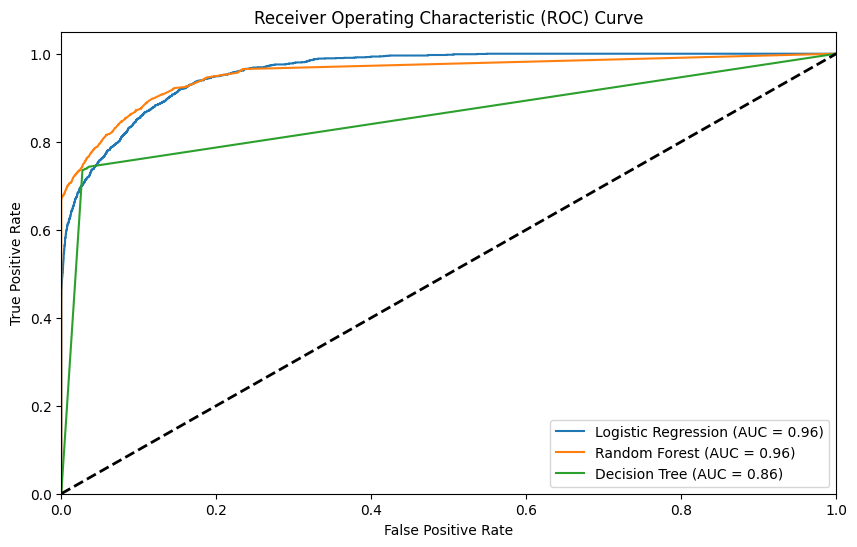

In [15]:
# Plot ROC Curve for all models
plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Get probability predictions (needed for ROC)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Diagonal random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Conclusion

**Statistical Significance:** To determine our inferential model (Statsmodels), we used it such that HbA1c and Blood Glucose are the leading risk factors of diabetes and P-values were found to be less than 0.05 of 0.000.

**Model Performance:** ROC Curve validation indicates that the AUC of Logistic Regression and random forest is 0.96 that is a good diagnostics.

**Validation:** ROC Curve validation indicates that the AUC of Logistic Regression and random forest is 0.96 that is a good diagnostics performance. The boundary that was developed by these features allows predicting diabetes with almost sufficient accuracy via this dataset.